In [1]:
cd C:\Users\User\Desktop\sem1_year4\fyp_thing

C:\Users\User\Desktop\sem1_year4\fyp_thing


In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

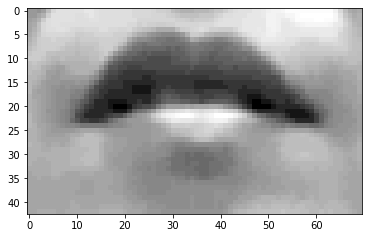

In [3]:
Datadirectory = "new_dataset/Training" ##Training 
Classes = ["closed_mouth","open_mouth"]
for category in Classes:
    path = os.path.join(Datadirectory, category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

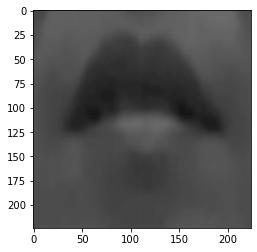

In [4]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [6]:
## Training Data preprocessing

In [5]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [6]:
create_training_Data()
print(len(training_Data))

4000


In [7]:
import random
random.shuffle(training_Data)

In [8]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size, 3)

In [9]:
X.shape

(4000, 224, 224, 3)

In [10]:
## normalize data
X= X/255

In [11]:
Y = np.array(y)

In [34]:
import pickle
pickle_out = open("X.pickle_mob","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle_mob","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
## augmentation

In [35]:
##from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
##aug = ImageDataGenerator(
   ##rotation_range=20,
   ##zoom_range=0.15,
   ##width_shift_range=0.2,
   ##height_shift_range=0.2,
   ##shear_range=0.15,
   ##brightness_range=[0,2],
   ##fill_mode="nearest")

In [14]:
## CNN 

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
model = tf.keras.applications.mobilenet.MobileNet()

In [14]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [15]:
base_input = model.layers[0].input 

In [16]:
base_output = model.layers[-4].output

In [17]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation("sigmoid")(final_output)

In [18]:
model1 = keras.Model(inputs = base_input, outputs = final_output)

In [19]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [43]:
##for layer in model1.layers:
    ##layer.trainable = False

In [20]:
model1.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [21]:
import time

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=6
)

N = 20
st=time.time()
H=model1.fit(X,Y, epochs = N, callbacks=[early_stopping],validation_split = 0.1)
end=time.time()
d=end-st
print(d)

Epoch 1/20
113/113 [==============================] - 333s 3s/step - loss: 0.0993 - accuracy: 0.9703 - val_loss: 0.5687 - val_accuracy: 0.9325
Epoch 2/20
113/113 [==============================] - 327s 3s/step - loss: 0.0242 - accuracy: 0.9933 - val_loss: 0.3732 - val_accuracy: 0.9375
Epoch 3/20
113/113 [==============================] - 323s 3s/step - loss: 0.0118 - accuracy: 0.9958 - val_loss: 0.0217 - val_accuracy: 0.9950
Epoch 4/20
113/113 [==============================] - 320s 3s/step - loss: 0.0121 - accuracy: 0.9956 - val_loss: 0.0331 - val_accuracy: 0.9900
Epoch 5/20
113/113 [==============================] - 319s 3s/step - loss: 0.0272 - accuracy: 0.9931 - val_loss: 0.0127 - val_accuracy: 0.9950
Epoch 6/20
113/113 [==============================] - 320s 3s/step - loss: 0.0172 - accuracy: 0.9939 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/20
113/113 [==============================] - 325s 3s/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0188 - val_accuracy: 0.9975

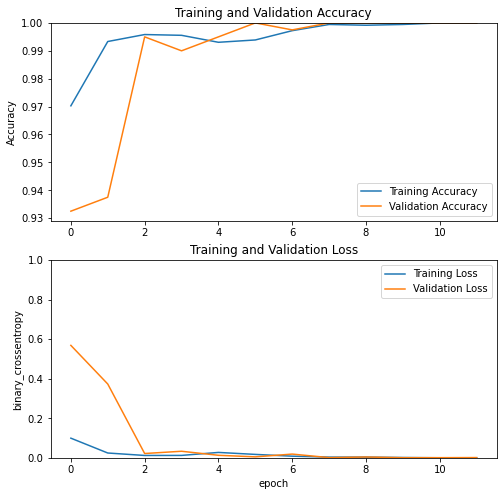

In [23]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

loss = H.history['loss']
val_loss = H.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('binary_crossentropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
model1.save('new_dataset/model_mobileNet_es.h5')